In [61]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import streamlit as st

# 폰트 지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False

# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

In [62]:
# 데이터 로드
dataset = pd.read_csv('dataset/Hypertension-risk-model-main.csv')
dataset = dataset.dropna()
print(dataset.shape)


(3751, 13)


In [63]:
dataset.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.00,0.00,0,195.00,106.00,70.00,26.97,80.00,77.00,0
1,0,46,0,0.00,0.00,0,250.00,121.00,81.00,28.73,95.00,76.00,0
2,1,48,1,20.00,0.00,0,245.00,127.50,80.00,25.34,75.00,70.00,0
3,0,61,1,30.00,0.00,0,225.00,150.00,95.00,28.58,65.00,103.00,1
4,0,46,1,23.00,0.00,0,285.00,130.00,84.00,23.10,85.00,85.00,0


In [64]:
# 결측치 관측
display(dataset.isnull().sum())

male             0
age              0
currentSmoker    0
cigsPerDay       0
BPMeds           0
diabetes         0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
Risk             0
dtype: int64

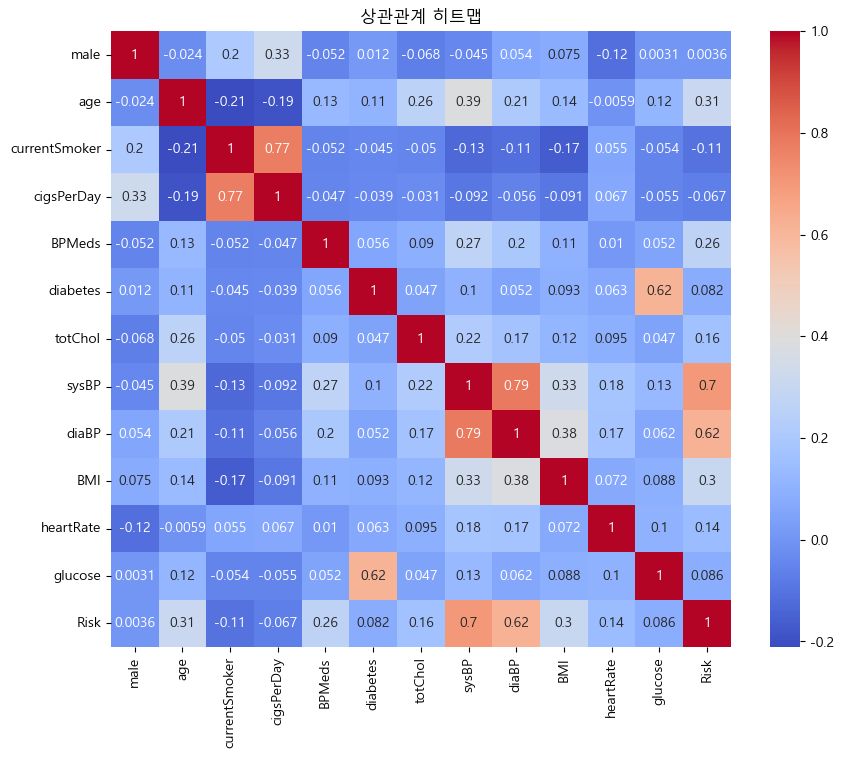

In [65]:
# 변수별 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('상관관계 히트맵')
plt.show()

In [66]:
# feature와 target분리
X = dataset.drop('Risk', axis=1)
y = dataset['Risk']

In [67]:
# feature 확인
X

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.00,0.00,0,195.00,106.00,70.00,26.97,80.00,77.00
1,0,46,0,0.00,0.00,0,250.00,121.00,81.00,28.73,95.00,76.00
2,1,48,1,20.00,0.00,0,245.00,127.50,80.00,25.34,75.00,70.00
3,0,61,1,30.00,0.00,0,225.00,150.00,95.00,28.58,65.00,103.00
4,0,46,1,23.00,0.00,0,285.00,130.00,84.00,23.10,85.00,85.00
...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.00,0.00,0,313.00,179.00,92.00,25.97,66.00,86.00
4234,1,51,1,43.00,0.00,0,207.00,126.50,80.00,19.71,65.00,68.00
4237,0,52,0,0.00,0.00,0,269.00,133.50,83.00,21.47,80.00,107.00
4238,1,40,0,0.00,0.00,0,185.00,141.00,98.00,25.60,67.00,72.00


In [68]:
# target 확인
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4237    0
4238    1
4239    0
Name: Risk, Length: 3751, dtype: int64

In [69]:
# 훈련 데이터 및 테스트 데이터로 분류
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 고혈압 특성 중요도 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [70]:
y_pred = model.predict(X_test)

In [71]:
# # 모델 평가
print("\n모델 성능:")
print("R² 점수:", r2_score(y_test, y_pred))
print("평균 제곱 오차 (MSE):", mean_squared_error(y_test, y_pred))
print("평균 절대 오차 (MAE):", mean_absolute_error(y_test, y_pred))


모델 성능:
R² 점수: 0.47543089113491555
평균 제곱 오차 (MSE): 0.11278215843762715
평균 절대 오차 (MAE): 0.2712763658390605


In [72]:
# 고혈압 데이터의 특성 중요도 분석
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(model.coef_)
})

feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\n특성 중요도:")
print(feature_importance)


특성 중요도:
          feature  importance
4          BPMeds        0.24
5        diabetes        0.03
0            male        0.02
7           sysBP        0.01
2   currentSmoker        0.01
8           diaBP        0.01
9             BMI        0.01
1             age        0.00
10      heartRate        0.00
11        glucose        0.00
3      cigsPerDay        0.00
6         totChol        0.00


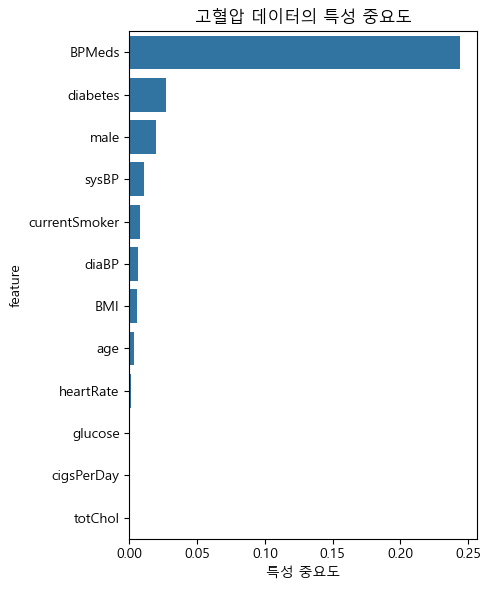

In [73]:
# 시각화: 고혈압 데이터의 특성 중요도
plt.figure(figsize=(5, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('고혈압 데이터의 특성 중요도')
plt.xlabel('특성 중요도')
plt.tight_layout()
plt.show()

In [74]:
# 특성 중요도를 이용하여 feature 재설정
X = dataset[['BPMeds', 'diabetes', 'male', 'sysBP', 'currentSmoker']]
y = dataset['Risk']

In [75]:
# feature 확인
X

,BPMeds,diabetes,male,sysBP,currentSmoker
0,0.00,0,1,106.00,0
1,0.00,0,0,121.00,0
2,0.00,0,1,127.50,1
3,0.00,0,0,150.00,1
4,0.00,0,0,130.00,1
...,...,...,...,...,...
4233,0.00,0,1,179.00,1
4234,0.00,0,1,126.50,1
4237,0.00,0,0,133.50,0
4238,0.00,0,1,141.00,0


In [76]:
# target 확인
y

0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4237    0
4238    1
4239    0
Name: Risk, Length: 3751, dtype: int64

In [77]:
# 훈련 데이터 및 테스트 데이터 분류
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
# 재설정된 데이터를 기반으로 모델 생성 및 학습(고혈압 체크 모델, 랜덤포레스트 사용)
rf_model = RandomForestClassifier(n_estimators=30, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30, random_state=42)

In [79]:
sr = SGDRegressor(max_iter=200, eta0=1e-4, random_state=0, verbose=1)
# max_iter: 모델 학습 횟수, eta0: 학습율(1e-4: 0.0001), verbose = 1 학습결과 출력
sr.fit(X_train, y_train) 

-- Epoch 1
Norm: 0.00, NNZs: 5, Bias: -0.002471, T: 3000, Avg. loss: 0.114006
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.01, NNZs: 5, Bias: -0.004100, T: 6000, Avg. loss: 0.102362
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.01, NNZs: 5, Bias: -0.005471, T: 9000, Avg. loss: 0.101059
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.01, NNZs: 5, Bias: -0.006763, T: 12000, Avg. loss: 0.099867
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.01, NNZs: 5, Bias: -0.007971, T: 15000, Avg. loss: 0.099604
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.01, NNZs: 5, Bias: -0.009121, T: 18000, Avg. loss: 0.099152
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.01, NNZs: 5, Bias: -0.010230, T: 21000, Avg. loss: 0.098263
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.01, NNZs: 5, Bias: -0.011296, T: 24000, Avg. loss: 0.097728
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.01, NNZs: 5, Bias: -0.012341, T: 27000, Avg. loss: 0.097870
Total traini

SGDRegressor(eta0=0.0001, max_iter=200, random_state=0, verbose=1)

In [80]:
# 예측
y_pred_rf = rf_model.predict(X_test)

In [81]:
# 랜덤 포레스트 평가
print("랜덤 포레스트 성능:")
print(f"정확도: {accuracy_score(y_test, y_pred_rf):.2f}")
print("분류 보고서:\n", classification_report(y_test, y_pred_rf))
print("혼동 행렬:\n", confusion_matrix(y_test, y_pred_rf))

랜덤 포레스트 성능:
정확도: 0.89
분류 보고서:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       516
           1       0.84      0.80      0.82       235

    accuracy                           0.89       751
   macro avg       0.87      0.87      0.87       751
weighted avg       0.89      0.89      0.89       751

혼동 행렬:
 [[479  37]
 [ 46 189]]


In [82]:
# 다른 모델과 비교
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

In [83]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} - 정확도: {acc}")

Logistic Regression - 정확도: 0.8921438082556591
Decision Tree - 정확도: 0.8881491344873502


In [84]:
# 랜덤 포레스트 하이퍼파라미터 튜닝(옵션)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [85]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [86]:
print("\n최적 하이퍼파라미터:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
tuned_rf_y_pred = best_rf_model.predict(X_test)


최적 하이퍼파라미터: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [87]:
# 튜닝된 모델 평가
tuned_rf_mse = mean_squared_error(y_test, tuned_rf_y_pred)
tuned_rf_r2 = accuracy_score(y_test, tuned_rf_y_pred)
print(f"튜닝된 랜덤 포레스트 - 정확도: {tuned_rf_r2:.2f}")

튜닝된 랜덤 포레스트 - 정확도: 0.89


In [88]:
# 고혈압 모델의 상관관계 그래프
data_combined = pd.concat([X, y], axis=1)
data_combined

,BPMeds,diabetes,male,sysBP,currentSmoker,Risk
0,0.00,0,1,106.00,0,0
1,0.00,0,0,121.00,0,0
2,0.00,0,1,127.50,1,0
3,0.00,0,0,150.00,1,1
4,0.00,0,0,130.00,1,0
...,...,...,...,...,...,...
4233,0.00,0,1,179.00,1,1
4234,0.00,0,1,126.50,1,0
4237,0.00,0,0,133.50,0,0
4238,0.00,0,1,141.00,0,1


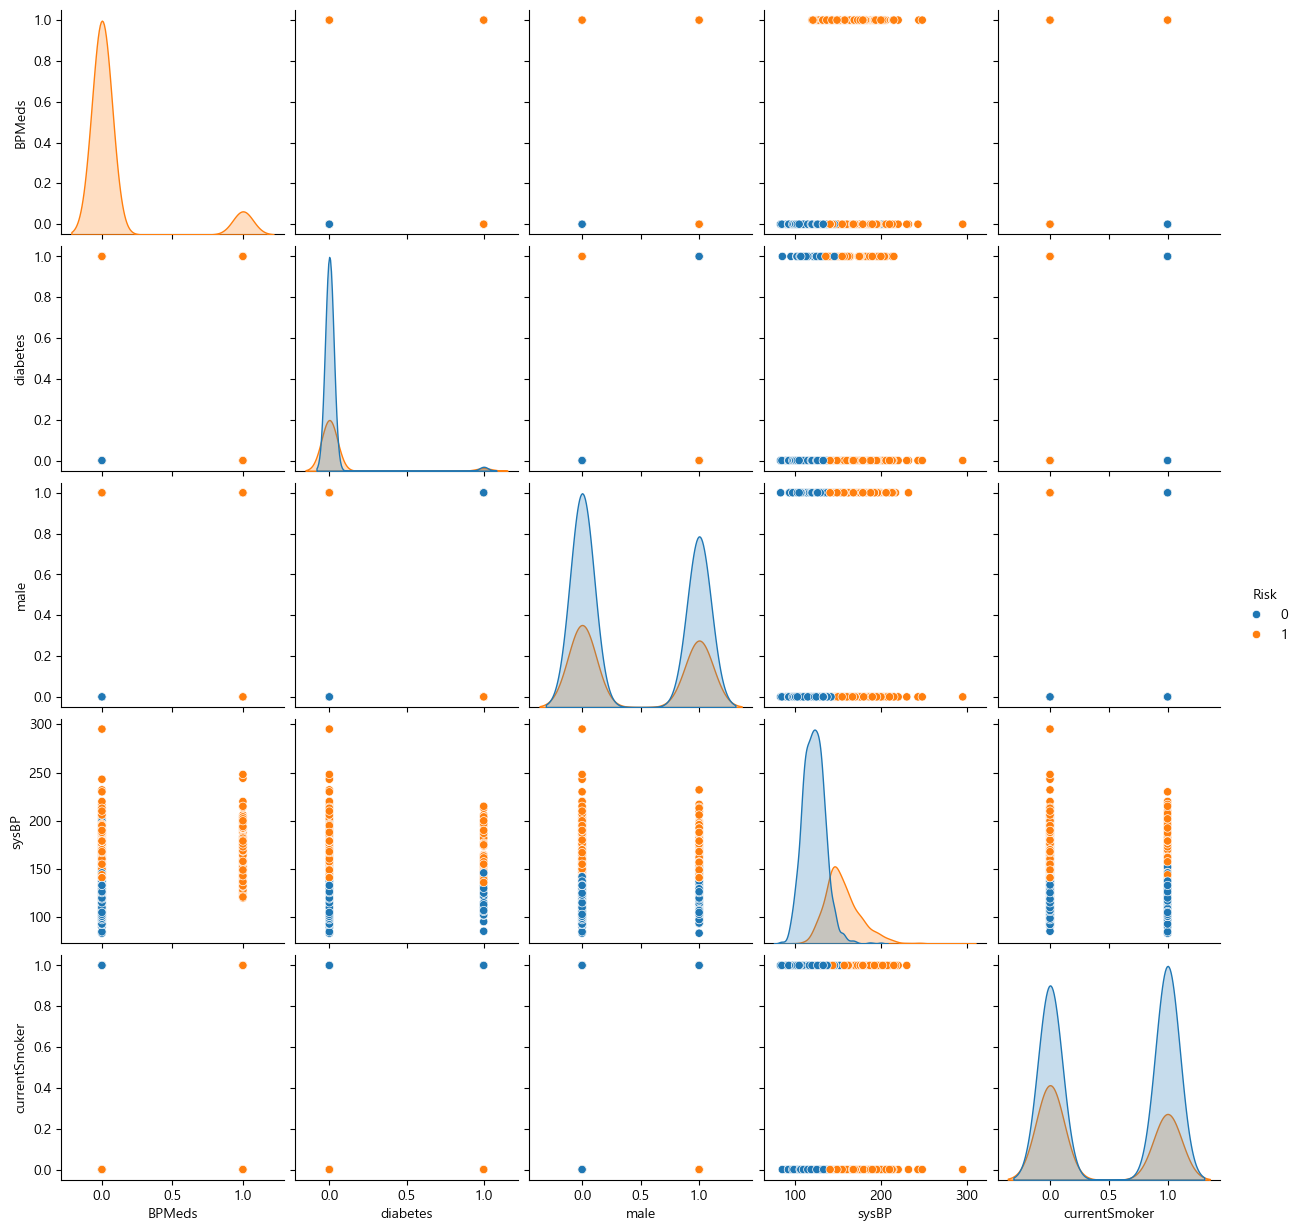

In [89]:
sns.pairplot(data_combined, hue='Risk')
plt.show()

In [90]:
# 고혈압 진단 후 합병증(뇌졸증) 예측 모델
# 데이터 로드
data = pd.read_csv('dataset/healthcare-dataset-stroke-data.csv')
data = data.dropna()
data = data.drop(['id'], axis=1)
data['gender'] = data['gender'].apply(lambda x: 1 if x == '남성' else 0)
data['Residence_type'] = data['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)
status = {
    'never smoked': 0,
    'formerly smoked': 1,
    'smoked' : 2,
    'smokes' : 3
}
data['smoking_status'] = data['smoking_status'].map(status).fillna(0)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.00,0,1,Yes,Private,1,228.69,36.60,1.00,1
2,0,80.00,0,1,Yes,Private,0,105.92,32.50,0.00,1
3,0,49.00,0,0,Yes,Private,1,171.23,34.40,3.00,1
4,0,79.00,1,0,Yes,Self-employed,0,174.12,24.00,0.00,1
5,0,81.00,0,0,Yes,Private,1,186.21,29.00,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.00,0,0,No,children,0,103.08,18.60,0.00,0
5106,0,81.00,0,0,Yes,Self-employed,1,125.20,40.00,0.00,0
5107,0,35.00,0,0,Yes,Self-employed,0,82.99,30.60,0.00,0
5108,0,51.00,0,0,Yes,Private,0,166.29,25.60,1.00,0


In [91]:
# feature, target 분리
X = data[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender', 'Residence_type', 'smoking_status']]
y = data['stroke']


In [92]:
# feature 확인
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender,Residence_type,smoking_status
0,67.00,0,1,228.69,36.60,0,1,1.00
2,80.00,0,1,105.92,32.50,0,0,0.00
3,49.00,0,0,171.23,34.40,0,1,3.00
4,79.00,1,0,174.12,24.00,0,0,0.00
5,81.00,0,0,186.21,29.00,0,1,1.00
...,...,...,...,...,...,...,...,...
5104,13.00,0,0,103.08,18.60,0,0,0.00
5106,81.00,0,0,125.20,40.00,0,1,0.00
5107,35.00,0,0,82.99,30.60,0,0,0.00
5108,51.00,0,0,166.29,25.60,0,0,1.00


In [93]:
# target 확인
y

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4909, dtype: int64

In [94]:
# 훈련 데이터 및 테스트 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
# 합병증(뇌졸증) 특성 분포도 모델 생성 및 학습
st_model = LinearRegression()
st_model.fit(X_train, y_train)

LinearRegression()

In [96]:
# 뇌졸증 특성 중요도
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(st_model.coef_)
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

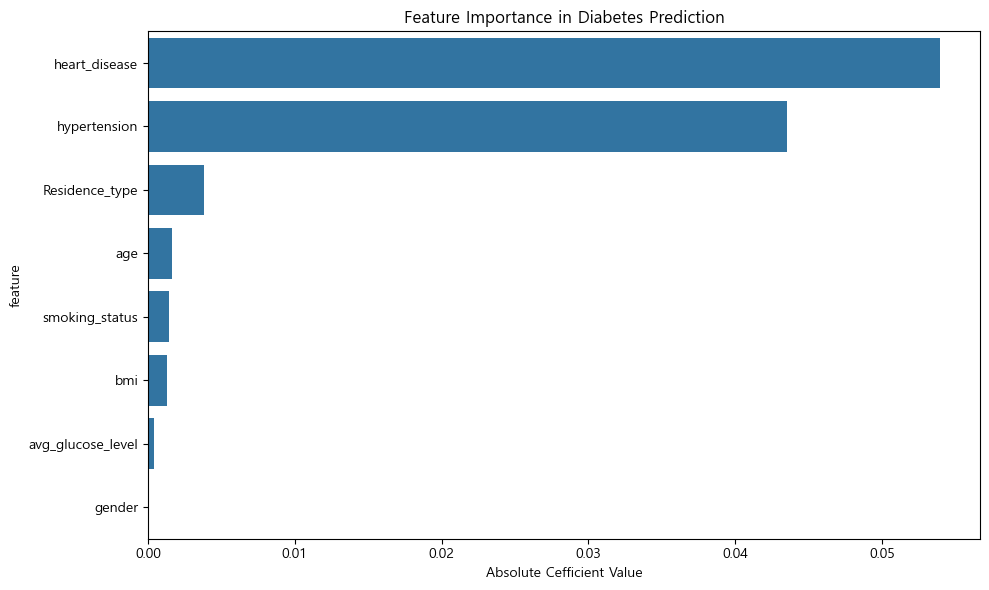

In [97]:
# 뇌졸증 특성 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Diabetes Prediction')
plt.xlabel('Absolute Cefficient Value')
plt.tight_layout()
plt.show()

In [98]:
# 특성 중요도에 의해서 데이터 재설정
X = data[['heart_disease', 'hypertension', 'age', 'bmi']]
y = data['stroke']

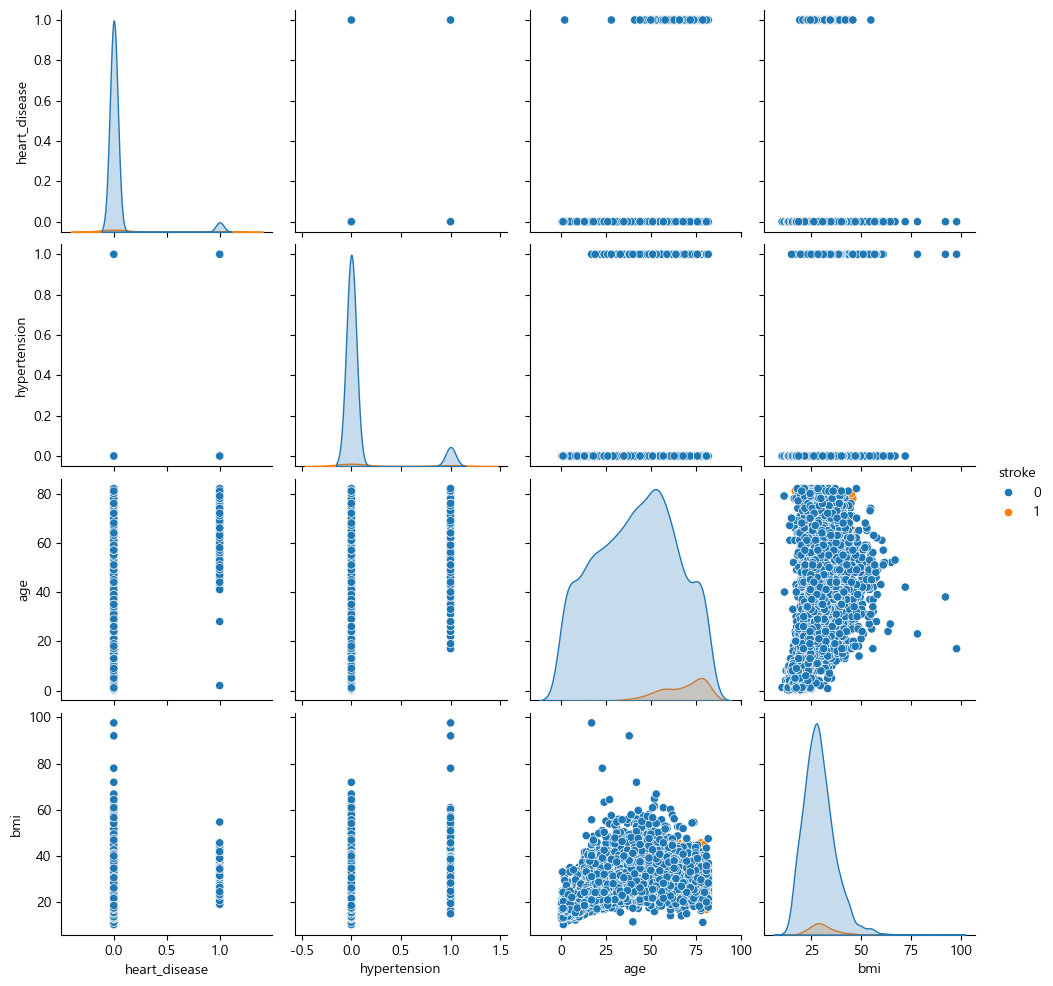

In [99]:
# 뇌졸증 예측모델의 상관관계 그래프
data_combined = pd.concat([X, y], axis=1)
data_combined
sns.pairplot(data_combined, hue='stroke')
plt.show()

In [100]:
# 훈련 데이터 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
# 뇌졸증 예측 모델 생성 및 학습
st_reg_model = RandomForestClassifier(random_state=42)
st_reg_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [102]:
# 예측 및 정확도 평가
y_pred = st_reg_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

acc

0.9338085539714868

In [103]:
nu2 = st_reg_model.predict(X_test)
nu2

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,